# Оглавление
* 0. [Описание проекта](#project_description)  
   - 0.1.[Описание данных](#data_description)  
   - 0.2.[Чек-лист готовности проекта](#check_list)  
* 1. [Шаг1.Открытие файлов с данными и изучение общей информации](#step1)  
   - 1.1.[Файл calls](#calls)   
   - 1.2.[Вывод по датастеу calls](#calls_conclusion)  
   - 1.3.[Файл users](#users)  
   - 1.4.[Вывод по датастеу users](#users_conclusion)  
   - 1.5.[Файл messages](#messages)      
   - 1.6.[Вывод по датастеу messages](#messages_conclusion)  
   - 1.7.[Файл internet](#internet)   
   - 1.8.[Вывод по датастеу internet](#internet_conclusion)  
   - 1.9.[Файл tariffs](#tariffs)   
   - 1.10.[Вывод по датастеу tariffs](#tariffs_conclusion)  
* 2. [Шаг2. Предобработка данных для датасетов](#step2)  
   - 2.1.[Предобработка данных для датасета calls](#preprocessing_calls)  
   - 2.2.[Предобработка данных для датасета users](#preprocessing_users)  
   - 2.3.[Предобработка данных для датасета messages](#preprocessing_messages)  
   - 2.4.[Предобработка данных для датасета internet](#preprocessing_internet)  
   - 2.5.[Новые признаки](#new_columns)  
      + 2.5.1.[Количество сделанных звонков и израсходованных минут разговора по месяцам](#number_of_calls)
      + 2.5.2.[Количество отправленных сообщений по месяцам](#number_of_messages)
      + 2.5.3.[Объем израсходованного интернет-трафика по месяцам](#volume)
      + 2.5.4.[Помесячная выручка с каждого пользователя](#proceeds)
* 3. [Шаг3.Анализ данных](#data_analysis)  
    - 3.1.[Описание поведения клиентов оператора, исходя из выборки](#3.1)
    - 3.2.[Вычисление количества минут разговора, количества сообщений и объёма интернет-трафика пользователей каждого тарифа в месяц](#3.2)
    - 3.3.[Расчет среднего количества, дисперсии и стандартного отклонения](#3.3)
    - 3.4.[Построение гистограмм](#3.4)
* 4. [Шаг4.Проверка гипотез](#step4)
    - 4.1.[Гипотеза: 'средняя выручка пользователей тарифов «Ультра» и «Смарт» различается'](#h_1)
    - 4.2.[Гипотеза: 'средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов'](#h_2)
* 5. [Шаг5.Общий вывод](#step5)

### Проект 3. Определение перспективного тарифа для телеком-компаний  <a name="project_description"></a>

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи.    
Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.  

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.  

### Описание тарифов  

**Тариф «Смарт»**  
Ежемесячная плата: 550 рублей  
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика  
Стоимость услуг сверх тарифного пакета:  
минута разговора: 3 рубля  
сообщение: 3 рубля  
1 Гб интернет-трафика: 200 рублей    

**Тариф «Ультра»**  
Ежемесячная плата: 1950 рублей  
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика  
Стоимость услуг сверх тарифного пакета:  
минута разговора: 1 рубль  
сообщение: 1 рубль  
1 Гб интернет-трафика: 150 рублей   

Обратите внимание: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.


### Описание данных <a name="data_description"></a>

Таблица **users** (информация о пользователях): 

**user_id** — уникальный идентификатор пользователя  
**first_name** — имя пользователя  
**last_name** — фамилия пользователя  
**age** — возраст пользователя (годы)  
**reg_date** — дата подключения тарифа (день, месяц, год)  
**churn_date** — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)  
**city** — город проживания пользователя  
**tariff** — название тарифного плана  


Таблица **calls** (информация о звонках):  

**id** — уникальный номер звонка  
**call_date** — дата звонка  
**duration** — длительность звонка в минутах  
**user_id** — идентификатор пользователя, сделавшего звонок  


Таблица **messages** (информация о сообщениях):  

**id** — уникальный номер сообщения  
**message_date** — дата сообщения  
**user_id** — идентификатор пользователя, отправившего сообщение  

Таблица **internet** (информация об интернет-сессиях):  

**id** — уникальный номер сессии  
**mb_used** — объём потраченного за сессию интернет-трафика (в мегабайтах)  
**session_date** — дата интернет-сессии  
**user_id** — идентификатор пользователя  

Таблица **tariffs** (информация о тарифах):  

**tariff_name** — название тарифа  
**rub_monthly_fee** — ежемесячная абонентская плата в рублях  
**minutes_included** — количество минут разговора в месяц, включённых в абонентскую плату  
**messages_included** — количество сообщений в месяц, включённых в абонентскую плату  
**mb_per_month_included** — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)  
**rub_per_minute** — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101   минуты будет взиматься плата)  
**rub_per_message** — стоимость отправки сообщения сверх тарифного пакета   
**rub_per_gb** — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)    

### Чек-лист готовности проекта <a name="check_list"></a>

- [x]  открыт и изучен файл calls.csv
- [x]  открыт и изучен файл internet.csv
- [x]  открыт и изучен файл messages.csv
- [x]  открыт и изучен файл tariffs.csv
- [x]  открыт и изучен файл users.csv.
- [x]  предобработка данных calls
- [x]  предобработка данных internet
- [x]  предобработка данных messages
- [x]  предобработка данных users
- [x]  посчитать для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам
- [x]  посчитать для каждого пользователя количество отправленных сообщений по месяцам
- [x]  посчитать для каждого пользователя объем израсходованного интернет-трафика по месяцам
- [x]  посчитать для каждого пользователя помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану)
- [x]  выполнен шаг 2
- [x]   описать поведение клиентов оператора, исходя из выборки
- [x]   узнать, cколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц
- [x]   посчитать среднее количество, дисперсию и стандартное отклонение
- [x]   построить гистограммы
- [x]   описать распределения
- [x]   выполнен шаг 3
- [x]   проверить гипотезу:"средняя выручка пользователей тарифов «Ультра» и «Смарт» различается"
- [x]   проверить гипотезу:"средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"
- [x]   пояснить:как были сформулированы нулевая и альтернативная гипотезы 
- [x]   какой критерий использован для проверки гипотез и почему
- [x]   выполнен шаг 4
- [x]   есть общий вывод

### Шаг1.Открытие файлов с данными и изучение общей информации <a name="step1"></a>

In [136]:
#библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

##### Файл calls.csv <a name="calls"></a>

In [137]:
    calls = pd.read_csv('calls.csv')

In [138]:
display(calls.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [139]:
calls.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,202607.0,6.755887,5.843365,0.0,1.3,6.0,10.7,38.0
user_id,202607.0,1253.940619,144.722751,1000.0,1126.0,1260.0,1379.0,1499.0


In [140]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [141]:
calls.query('duration==0')

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
5,1000_5,2018-11-02,0.0,1000
6,1000_6,2018-10-18,0.0,1000
9,1000_9,2018-08-15,0.0,1000
...,...,...,...,...
202590,1499_203,2018-12-03,0.0,1499
202592,1499_205,2018-10-13,0.0,1499
202593,1499_206,2018-12-26,0.0,1499
202594,1499_207,2018-10-28,0.0,1499


##### Вывод по датасету calls <a name="calls_conclusion"></a>

В датасете calls 4 признака на 202607 строк.  
* необходимо поменять тип данных признака **id** на **int**;  
* необходимо поменять тип данных признака **call_date** на **datetime**; 
* необходимо поменять тип данных признака **duration** на **int**
* пропущенных значений нет;
* имеются нулевые значения в признаке **duration**

##### Файл users .csv <a name="users"></a>

In [142]:
users = pd.read_csv('users.csv')

In [143]:
display(users.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [144]:
users.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,500.0,1249.500,144.481833,1000.0,1124.75,1249.5,1374.25,1499.0
age,500.0,46.588,16.667630,18.0,32.00,46.0,62.00,75.0


In [145]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


##### Вывод по датасету users <a name="users_conclusion"></a>

В датасете users 8 признаков на 500 строк.  
* необходимо поменять тип данных признака **reg_date** на **datetime**; 
* необходимо поменять тип данных признака **churn_date** на **datetime**; 
* пропущенные значения имеются в признаке **churn_date** (дата прекращения пользования тарифом), возможно потому что данные пользователи на момент выгрузки данных не прекратили пользоваться тарифом, оставлю как есть, потому что это не критично, но сообщить разработчикам о проблеме стоит;


##### Файл messages.csv <a name="messages"></a>

In [146]:
messages = pd.read_csv('messages.csv')

In [147]:
display(messages.head())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [148]:
messages.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,123036.0,1256.98941,143.523967,1000.0,1134.0,1271.0,1381.0,1499.0


In [149]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


##### Вывод по датасету messages <a name="messages_conclusion"></a>

В датасете messages 3 признака на 123036 строк. 
* необходимо поменять тип данных признака **id** на **int64**;
* необходимо поменять тип данных признака **message_date** на **datetime**;  
* пропущенных значений нет

##### Файл internet.csv <a name="internet"></a>

In [150]:
internet = pd.read_csv('internet.csv')

In [151]:
display(internet.head())

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [152]:
internet.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,149396.0,74697.500000,43127.054745,0.0,37348.7500,74697.500,112046.2500,149395.00
mb_used,149396.0,370.192426,278.300951,0.0,138.1875,348.015,559.5525,1724.83
user_id,149396.0,1252.099842,144.050823,1000.0,1130.0000,1251.000,1380.0000,1499.00


In [153]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [154]:
internet.columns.str.match('Unnamed')

array([ True, False, False, False, False])

In [155]:
internet=internet.loc[:, ~internet.columns.str.match('Unnamed')]

In [156]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


##### Вывод по датасету internet <a name="internet_conclusion"></a>

В датасете internet 4 признака на 149396 строк. 
* необходимо поменять тип данных признака **id** на **int64**;
* необходимо поменять тип данных признака **session_date** на **datetime**;  
* пропущенных значений нет

##### Файл tariffs.csv <a name="tariffs"></a>

In [157]:
tariffs = pd.read_csv('tariffs.csv')

In [158]:
display(tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [159]:
tariffs.describe().T

,count,mean,std,min,25%,50%,75%,max
messages_included,2.0,525.0,671.751442,50.0,287.5,525.0,762.5,1000.0
mb_per_month_included,2.0,23040.0,10861.160159,15360.0,19200.0,23040.0,26880.0,30720.0
minutes_included,2.0,1750.0,1767.766953,500.0,1125.0,1750.0,2375.0,3000.0
rub_monthly_fee,2.0,1250.0,989.949494,550.0,900.0,1250.0,1600.0,1950.0
rub_per_gb,2.0,175.0,35.355339,150.0,162.5,175.0,187.5,200.0
rub_per_message,2.0,2.0,1.414214,1.0,1.5,2.0,2.5,3.0
rub_per_minute,2.0,2.0,1.414214,1.0,1.5,2.0,2.5,3.0


In [160]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


##### Вывод по датасету tariffs <a name="tariffs_conclusion"></a>

В датасете tariffs 8 признаков на 2 строки. 
* пропущенных значений нет

### Шаг 2. Предобработка данных для датасетов <a name="step2"></a>

Используя выводы шага 1 проведу предобработку данных для датасетов.

##### Предобработка данных для датасета calls <a name="preprocessing_calls"></a>

* необходимо поменять тип данных признака **id** на **int**;  
* необходимо поменять тип данных признака **call_date** на **datetime**; 
* необходимо поменять тип данных признака **duration** на **int**, имеются нулевые значения в признаке **duration**

In [161]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [162]:
calls['id']=calls['id'].astype('int')

In [163]:
calls['call_date'].head()

0    2018-07-25
1    2018-08-17
2    2018-06-11
3    2018-09-21
4    2018-12-15
Name: call_date, dtype: object

In [164]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [165]:
calls['duration'] = np.ceil(calls['duration'])

In [166]:
calls['duration']=calls['duration'].fillna(0)

In [167]:
calls['duration']=calls['duration'].astype('int')

In [168]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  int64         
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 6.2 MB


Нулевых звонков не может быть, так как все измеряется в минутах,могу сделать вывод, что разговор длился меньше минуты, поэтому такие разговоры представлю в виде 1 минуты.

In [169]:
calls['duration']=calls['duration'].replace(0,1)

Проверю изменения

In [170]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  int64         
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 6.2 MB


Нулевых значений нет, типы данных были изменены верно.

##### Предобработка данных для датасета users <a name="preprocessing_users"></a>

* необходимо поменять тип данных признака **reg_date** на **datetime**; 
* необходимо поменять тип данных признака **churn_date** на **datetime**; 

In [171]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [172]:
users['reg_date']=pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

In [173]:
users['churn_date']=pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

In [174]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


##### Предобработка данных для датасета messages <a name="preprocessing_messages"></a>

* необходимо поменять тип данных признака **id** на **int64**;
* необходимо поменять тип данных признака **message_date** на **datetime**;  

In [175]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [176]:
messages['id']=messages['id'].astype('int')


In [177]:
messages['message_date']=pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [178]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  int64         
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.8 MB


##### Предобработка данных для датасета internet <a name="preprocessing_internet"></a>

* необходимо поменять тип данных признака **id** на **int64**;
* необходимо поменять тип данных признака **session_date** на **datetime**;  


In [179]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


In [180]:
internet['id']=internet['id'].astype('int')

In [181]:
internet['session_date']=pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [182]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  int64         
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 4.6 MB


### Новые признаки <a name="new_columns"></a>

Необходимо посчитать для каждого пользователя:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

##### Количество сделанных звонков и израсходованных минут разговора по месяцам <a name="number_of_calls"></a>

Создам новые признаки в таблице **calls**:

In [183]:
calls['month'] = calls['call_date'].dt.month

In [184]:
calls['month_name'] = calls['call_date'].dt.month_name()

In [185]:
display(calls['month_name'])

0              July
1            August
2              June
3         September
4          December
            ...    
202602     December
202603      October
202604     November
202605      October
202606     December
Name: month_name, Length: 202607, dtype: object

In [186]:
display(calls['month'])

0          7
1          8
2          6
3          9
4         12
          ..
202602    12
202603    10
202604    11
202605    10
202606    12
Name: month, Length: 202607, dtype: int64

In [187]:
calls_grouped_on_month=calls.pivot_table(index=['user_id','month','month_name'],
                                        values=['duration'],
                                        aggfunc='sum').reset_index()
columns=['user_id', 'month', 'month_name','total_minutes']
calls_grouped_on_month.columns=columns

In [188]:
calls_grouped_on_month['total_minutes'].describe().T

count    3174.000000
mean      469.412098
std       243.916429
min         1.000000
25%       298.000000
50%       458.000000
75%       608.000000
max      1727.000000
Name: total_minutes, dtype: float64

In [189]:
display(calls_grouped_on_month.head(5))

,user_id,month,month_name,total_minutes
0,1000,5,May,164
1,1000,6,June,187
2,1000,7,July,346
3,1000,8,August,418
4,1000,9,September,478


##### Количество отправленных сообщений по месяцам <a name="number_of_messages"></a>

Создам новые признаки в таблице **messages**:

In [190]:
messages['month'] = messages['message_date'].dt.month

In [191]:
messages['month_name'] = messages['message_date'].dt.month_name()

In [192]:
messages_grouped_on_month=messages.pivot_table(index=['user_id','month','month_name'],
                                        values=['id'],
                                        aggfunc='count').reset_index()
columns=['user_id', 'month', 'month_name','number_of_messages']
messages_grouped_on_month.columns=columns

In [193]:
messages_grouped_on_month['number_of_messages'].describe().T

count    2717.000000
mean       45.283769
std        35.051363
min         1.000000
25%        19.000000
50%        38.000000
75%        63.000000
max       224.000000
Name: number_of_messages, dtype: float64

In [194]:
display(messages_grouped_on_month)

,user_id,month,month_name,number_of_messages
0,1000,5,May,22
1,1000,6,June,60
2,1000,7,July,75
3,1000,8,August,81
4,1000,9,September,57
...,...,...,...,...
2712,1498,10,October,42
2713,1499,9,September,11
2714,1499,10,October,48
2715,1499,11,November,59


In [195]:
messages_grouped_on_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             2717 non-null   int64 
 1   month               2717 non-null   int64 
 2   month_name          2717 non-null   object
 3   number_of_messages  2717 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 85.0+ KB


##### Объем израсходованного интернет-трафика по месяцам <a name="volume"></a>

In [196]:
internet['month']=internet['session_date'].dt.month

In [197]:
internet['month_name']=internet['session_date'].dt.month_name()

In [198]:
volume_grouped_on_month = internet.pivot_table(index=['user_id', 'month','month_name'],
                                       values=['mb_used'],
                                       aggfunc='sum').reset_index()
volume_grouped_on_month.columns = ['user_id', 'month','month_name', 'internet_traffic_consumed']

In [199]:
volume_grouped_on_month['internet_traffic_consumed']=(volume_grouped_on_month['internet_traffic_consumed']/1024)

In [200]:
volume_grouped_on_month['internet_traffic_consumed'].describe().T

count    3203.000000
mean       16.862020
std         7.340192
min         0.000000
25%        12.233306
50%        16.565537
75%        20.929858
max        48.579775
Name: internet_traffic_consumed, dtype: float64

In [201]:
volume_grouped_on_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   user_id                    3203 non-null   int64  
 1   month                      3203 non-null   int64  
 2   month_name                 3203 non-null   object 
 3   internet_traffic_consumed  3203 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 100.2+ KB


##### Помесячная выручка с каждого пользователя <a name="proceeds"></a>

(Как найти: вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножить на значение из тарифного плана; прибавить абонентскую плату, соответствующую тарифному плану).

Для начала объединю три готовые таблички в одну.

In [202]:
total_data_on_month= calls_grouped_on_month.merge(messages_grouped_on_month, on=['user_id','month','month_name'], how='outer')
total_data_on_month= total_data_on_month.merge(volume_grouped_on_month, on=['user_id','month','month_name'], how='outer')




In [203]:
total_data_on_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   user_id                    3214 non-null   int64  
 1   month                      3214 non-null   int64  
 2   month_name                 3214 non-null   object 
 3   total_minutes              3174 non-null   float64
 4   number_of_messages         2717 non-null   float64
 5   internet_traffic_consumed  3203 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 175.8+ KB


Можно заметить, что в новых переменных имеются пропущенные значения в признаках total_minutes, number_of_messages, internet_traffic_consumed. Это может означать, что люди не израсходавали за месяц свой лимит по звонкам, сообщениям и интернет_траффику.

Избавлюсь от пропущенных значений

In [204]:
total_data_on_month=total_data_on_month.fillna(0)

In [205]:
total_data_on_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   user_id                    3214 non-null   int64  
 1   month                      3214 non-null   int64  
 2   month_name                 3214 non-null   object 
 3   total_minutes              3214 non-null   float64
 4   number_of_messages         3214 non-null   float64
 5   internet_traffic_consumed  3214 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 175.8+ KB


In [206]:
total_data_on_month = users.merge(total_data_on_month, on='user_id', how='outer')
display(total_data_on_month)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,month_name,total_minutes,number_of_messages,internet_traffic_consumed
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,May,164.0,22.0,2.200674
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,June,187.0,60.0,22.689229
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,July,346.0,75.0,13.675430
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,August,418.0,81.0,13.726494
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,September,478.0,57.0,14.227451
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10.0,October,258.0,42.0,20.097031
3212,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9.0,September,71.0,11.0,1.802490
3213,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,10.0,October,473.0,48.0,17.371592
3214,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,11.0,November,624.0,59.0,17.542295


Удалю неинтересующие колонки

In [207]:
total_data_on_month = total_data_on_month.drop(['age', 'first_name', 'last_name'], axis=1)

In [208]:
display(total_data_on_month)

,user_id,churn_date,city,reg_date,tariff,month,month_name,total_minutes,number_of_messages,internet_traffic_consumed
0,1000,NaT,Краснодар,2018-05-25,ultra,5.0,May,164.0,22.0,2.200674
1,1000,NaT,Краснодар,2018-05-25,ultra,6.0,June,187.0,60.0,22.689229
2,1000,NaT,Краснодар,2018-05-25,ultra,7.0,July,346.0,75.0,13.675430
3,1000,NaT,Краснодар,2018-05-25,ultra,8.0,August,418.0,81.0,13.726494
4,1000,NaT,Краснодар,2018-05-25,ultra,9.0,September,478.0,57.0,14.227451
...,...,...,...,...,...,...,...,...,...,...
3211,1498,2018-10-25,Владикавказ,2018-07-19,smart,10.0,October,258.0,42.0,20.097031
3212,1499,NaT,Пермь,2018-09-27,smart,9.0,September,71.0,11.0,1.802490
3213,1499,NaT,Пермь,2018-09-27,smart,10.0,October,473.0,48.0,17.371592
3214,1499,NaT,Пермь,2018-09-27,smart,11.0,November,624.0,59.0,17.542295


Проверю, есть ли пропущенные значения в признаке количество израсходованных минут

In [209]:
total_data_on_month[total_data_on_month['total_minutes'].isna()]

,user_id,churn_date,city,reg_date,tariff,month,month_name,total_minutes,number_of_messages,internet_traffic_consumed
827,1128,2018-12-23,Волжский,2018-12-15,ultra,NaN,NaN,NaN,NaN,NaN
2335,1371,2018-12-30,Омск,2018-12-25,smart,NaN,NaN,NaN,NaN,NaN


Избавлюсь от двух строк

In [210]:
total_data_on_month = total_data_on_month[total_data_on_month['total_minutes'].notna()]
total_data_on_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3215
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   user_id                    3214 non-null   int64         
 1   churn_date                 187 non-null    datetime64[ns]
 2   city                       3214 non-null   object        
 3   reg_date                   3214 non-null   datetime64[ns]
 4   tariff                     3214 non-null   object        
 5   month                      3214 non-null   float64       
 6   month_name                 3214 non-null   object        
 7   total_minutes              3214 non-null   float64       
 8   number_of_messages         3214 non-null   float64       
 9   internet_traffic_consumed  3214 non-null   float64       
dtypes: datetime64[ns](2), float64(4), int64(1), object(3)
memory usage: 276.2+ KB


Еще раз приведу значения к нужным типам

In [211]:
total_data_on_month['month'] = total_data_on_month['month'].astype('int')

In [212]:
total_data_on_month['number_of_messages'] = total_data_on_month['number_of_messages'].astype('int')

In [213]:
total_data_on_month['total_minutes'] = total_data_on_month['total_minutes'].astype('int')

In [214]:
total_data_on_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3215
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   user_id                    3214 non-null   int64         
 1   churn_date                 187 non-null    datetime64[ns]
 2   city                       3214 non-null   object        
 3   reg_date                   3214 non-null   datetime64[ns]
 4   tariff                     3214 non-null   object        
 5   month                      3214 non-null   int64         
 6   month_name                 3214 non-null   object        
 7   total_minutes              3214 non-null   int64         
 8   number_of_messages         3214 non-null   int64         
 9   internet_traffic_consumed  3214 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 276.2+ KB


In [215]:
display(total_data_on_month)

,user_id,churn_date,city,reg_date,tariff,month,month_name,total_minutes,number_of_messages,internet_traffic_consumed
0,1000,NaT,Краснодар,2018-05-25,ultra,5,May,164,22,2.200674
1,1000,NaT,Краснодар,2018-05-25,ultra,6,June,187,60,22.689229
2,1000,NaT,Краснодар,2018-05-25,ultra,7,July,346,75,13.675430
3,1000,NaT,Краснодар,2018-05-25,ultra,8,August,418,81,13.726494
4,1000,NaT,Краснодар,2018-05-25,ultra,9,September,478,57,14.227451
...,...,...,...,...,...,...,...,...,...,...
3211,1498,2018-10-25,Владикавказ,2018-07-19,smart,10,October,258,42,20.097031
3212,1499,NaT,Пермь,2018-09-27,smart,9,September,71,11,1.802490
3213,1499,NaT,Пермь,2018-09-27,smart,10,October,473,48,17.371592
3214,1499,NaT,Пермь,2018-09-27,smart,11,November,624,59,17.542295


In [216]:
display(tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Заменю название признака на то, по которому могу соединить данные

In [217]:
tariffs = tariffs.rename({'tariff_name': 'tariff'}, axis=1)

In [218]:
total_data_on_month=tariffs.merge(total_data_on_month,on='tariff', how='left')

In [219]:
display(total_data_on_month.head())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff,user_id,churn_date,city,reg_date,month,month_name,total_minutes,number_of_messages,internet_traffic_consumed
0,50,15360,500,550,200,3,3,smart,1001,NaT,Москва,2018-11-01,11,November,444,0,17.997402
1,50,15360,500,550,200,3,3,smart,1001,NaT,Москва,2018-11-01,12,December,430,0,13.707676
2,50,15360,500,550,200,3,3,smart,1002,NaT,Стерлитамак,2018-06-17,6,June,118,4,10.602363
3,50,15360,500,550,200,3,3,smart,1002,NaT,Стерлитамак,2018-06-17,7,July,219,11,17.168066
4,50,15360,500,550,200,3,3,smart,1002,NaT,Стерлитамак,2018-06-17,8,August,294,13,19.843027


Переведу мегабайты в гигабайты

In [220]:
total_data_on_month['mb_per_month_included']=(total_data_on_month['mb_per_month_included']/1024)

In [221]:
display(total_data_on_month.head())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff,user_id,churn_date,city,reg_date,month,month_name,total_minutes,number_of_messages,internet_traffic_consumed
0,50,15.0,500,550,200,3,3,smart,1001,NaT,Москва,2018-11-01,11,November,444,0,17.997402
1,50,15.0,500,550,200,3,3,smart,1001,NaT,Москва,2018-11-01,12,December,430,0,13.707676
2,50,15.0,500,550,200,3,3,smart,1002,NaT,Стерлитамак,2018-06-17,6,June,118,4,10.602363
3,50,15.0,500,550,200,3,3,smart,1002,NaT,Стерлитамак,2018-06-17,7,July,219,11,17.168066
4,50,15.0,500,550,200,3,3,smart,1002,NaT,Стерлитамак,2018-06-17,8,August,294,13,19.843027


Удалю неинтересующие признаки

In [222]:
total_data_on_month = total_data_on_month.drop(['churn_date', 'reg_date'], axis=1)


In [223]:
display(total_data_on_month.head())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff,user_id,city,month,month_name,total_minutes,number_of_messages,internet_traffic_consumed
0,50,15.0,500,550,200,3,3,smart,1001,Москва,11,November,444,0,17.997402
1,50,15.0,500,550,200,3,3,smart,1001,Москва,12,December,430,0,13.707676
2,50,15.0,500,550,200,3,3,smart,1002,Стерлитамак,6,June,118,4,10.602363
3,50,15.0,500,550,200,3,3,smart,1002,Стерлитамак,7,July,219,11,17.168066
4,50,15.0,500,550,200,3,3,smart,1002,Стерлитамак,8,August,294,13,19.843027


In [224]:
total_data_on_month['total_minutes']=total_data_on_month['total_minutes'].apply(np.ceil).astype('int')

In [225]:
total_data_on_month['number_of_messages']=total_data_on_month['number_of_messages'].apply(np.ceil).astype('int')

In [226]:
total_data_on_month['internet_traffic_consumed']=total_data_on_month['internet_traffic_consumed'].apply(np.ceil)

In [227]:
total_data_on_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   messages_included          3214 non-null   int64  
 1   mb_per_month_included      3214 non-null   float64
 2   minutes_included           3214 non-null   int64  
 3   rub_monthly_fee            3214 non-null   int64  
 4   rub_per_gb                 3214 non-null   int64  
 5   rub_per_message            3214 non-null   int64  
 6   rub_per_minute             3214 non-null   int64  
 7   tariff                     3214 non-null   object 
 8   user_id                    3214 non-null   int64  
 9   city                       3214 non-null   object 
 10  month                      3214 non-null   int64  
 11  month_name                 3214 non-null   object 
 12  total_minutes              3214 non-null   int64  
 13  number_of_messages         3214 non-null   int64

Найду остаток минут, сообщений и интернет трафика и добавлю новые столбцы

In [228]:
total_data_on_month['rest_minutes']=total_data_on_month['total_minutes']-total_data_on_month['minutes_included']

In [229]:
total_data_on_month['rest_message']=total_data_on_month['number_of_messages']-total_data_on_month['messages_included']

In [230]:
total_data_on_month['rest_mb_gb']=total_data_on_month['internet_traffic_consumed']-total_data_on_month['mb_per_month_included']

Отрицательные значения указывают на то, что количество минут, сообщений и интернет трафика,имеющиеся в рамках тарифа. Положительные указывают на перерасход тарифа.

In [231]:
def proceeds_over(dataset):
    
    price_minutes=0
    price_messages=0
    price_mb_gb=0
    
    if dataset['rest_minutes']>=0:
        price_minutes=dataset['rub_per_minute']*dataset['rest_minutes']
    else: 0
        
    if dataset['rest_message']>=0:
        price_messages=dataset['rub_per_message']*dataset['rest_message']
    else: 0
        
    if dataset['rest_mb_gb']>=0:
        price_mb_gb=np.ceil(dataset['rub_per_gb']*(dataset['rest_mb_gb']))
    else: 0 
        
    return price_minutes+price_messages+price_mb_gb

In [232]:
total_data_on_month['proceeds_over'] = total_data_on_month.apply(proceeds_over, axis=1)
total_data_on_month['proceeds_total'] = total_data_on_month['rub_monthly_fee'] + total_data_on_month['proceeds_over']

In [233]:
total_data_on_month['proceeds_over']=total_data_on_month['proceeds_over'].apply(np.ceil).astype('int')
total_data_on_month['proceeds_total']=total_data_on_month['proceeds_total'].apply(np.ceil).astype('int')

In [234]:
total_data_on_month['proceeds_over'].describe().T

count    3214.000000
mean      561.789048
std       777.459105
min         0.000000
25%         0.000000
50%       192.000000
75%       988.000000
max      6274.000000
Name: proceeds_over, dtype: float64

In [235]:
total_data_on_month['proceeds_total'].describe().T

count    3214.000000
mean     1540.849409
std       801.291720
min       550.000000
25%       750.000000
50%      1689.000000
75%      1950.000000
max      6824.000000
Name: proceeds_total, dtype: float64

In [236]:
smart=total_data_on_month.query("tariff=='smart'")
smart_count_users=len(smart.groupby('user_id'))

In [237]:
display(smart)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff,user_id,city,month,month_name,total_minutes,number_of_messages,internet_traffic_consumed,rest_minutes,rest_message,rest_mb_gb,proceeds_over,proceeds_total
0,50,15.0,500,550,200,3,3,smart,1001,Москва,11,November,444,0,18.0,-56,-50,3.0,600,1150
1,50,15.0,500,550,200,3,3,smart,1001,Москва,12,December,430,0,14.0,-70,-50,-1.0,0,550
2,50,15.0,500,550,200,3,3,smart,1002,Стерлитамак,6,June,118,4,11.0,-382,-46,-4.0,0,550
3,50,15.0,500,550,200,3,3,smart,1002,Стерлитамак,7,July,219,11,18.0,-281,-39,3.0,600,1150
4,50,15.0,500,550,200,3,3,smart,1002,Стерлитамак,8,August,294,13,20.0,-206,-37,5.0,1000,1550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,50,15.0,500,550,200,3,3,smart,1498,Владикавказ,10,October,258,42,21.0,-242,-8,6.0,1200,1750
2225,50,15.0,500,550,200,3,3,smart,1499,Пермь,9,September,71,11,2.0,-429,-39,-13.0,0,550
2226,50,15.0,500,550,200,3,3,smart,1499,Пермь,10,October,473,48,18.0,-27,-2,3.0,600,1150
2227,50,15.0,500,550,200,3,3,smart,1499,Пермь,11,November,624,59,18.0,124,9,3.0,999,1549


In [238]:
ultra=total_data_on_month.query("tariff=='ultra'")
ultra_count_users=len(ultra.groupby('user_id'))

In [239]:
display(ultra)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff,user_id,city,month,month_name,total_minutes,number_of_messages,internet_traffic_consumed,rest_minutes,rest_message,rest_mb_gb,proceeds_over,proceeds_total
2229,1000,30.0,3000,1950,150,1,1,ultra,1000,Краснодар,5,May,164,22,3.0,-2836,-978,-27.0,0,1950
2230,1000,30.0,3000,1950,150,1,1,ultra,1000,Краснодар,6,June,187,60,23.0,-2813,-940,-7.0,0,1950
2231,1000,30.0,3000,1950,150,1,1,ultra,1000,Краснодар,7,July,346,75,14.0,-2654,-925,-16.0,0,1950
2232,1000,30.0,3000,1950,150,1,1,ultra,1000,Краснодар,8,August,418,81,14.0,-2582,-919,-16.0,0,1950
2233,1000,30.0,3000,1950,150,1,1,ultra,1000,Краснодар,9,September,478,57,15.0,-2522,-943,-15.0,0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1000,30.0,3000,1950,150,1,1,ultra,1495,Иркутск,8,August,96,13,3.0,-2904,-987,-27.0,0,1950
3210,1000,30.0,3000,1950,150,1,1,ultra,1495,Иркутск,9,September,830,82,33.0,-2170,-918,3.0,450,2400
3211,1000,30.0,3000,1950,150,1,1,ultra,1495,Иркутск,10,October,1056,82,29.0,-1944,-918,-1.0,0,1950
3212,1000,30.0,3000,1950,150,1,1,ultra,1495,Иркутск,11,November,971,79,39.0,-2029,-921,9.0,1350,3300


In [240]:
print('Количество пользователей тарифа смарт:',smart_count_users)
print('Количество пользователей тарифа ультра:',ultra_count_users)

Количество пользователей тарифа смарт: 350
Количество пользователей тарифа ультра: 148


### Шаг 3. Анализ данных <a name="data_analysis"></a>


##### Описание поведения клиентов оператора, исходя из выборки <a name="3.1"></a>


Известно, что количество пользователей тарифа смарт: 350, а ультра 148.

Создам таблицу по интересующим признакам.

In [241]:
columns=['total_minutes','number_of_messages','internet_traffic_consumed','proceeds_over','proceeds_total']
tariff_monthly = total_data_on_month.pivot_table(
    index=['tariff', 'city'],
    values=columns
)

In [242]:
display(tariff_monthly)

internet_traffic_consumed  number_of_messages  \
tariff city                                                         
smart  Архангельск                  17.333333           19.000000   
       Астрахань                    16.400000           41.840000   
       Балашиха                     15.681818           11.318182   
       Барнаул                      12.000000           11.000000   
       Белгород                     13.066667           33.800000   
...                                       ...                 ...   
ultra  Уфа                          15.200000           49.033333   
       Чебоксары                    27.750000          173.000000   
       Челябинск                    17.545455           51.363636   
       Череповец                    12.333333           14.000000   
       Ярославль                    20.571429          119.000000   

                    proceeds_over  proceeds_total  total_minutes  
tariff city                                                       
smart  Архангельск     757.333333     1307.333333     426.500000  
       Астрахань       766.560000     1316.560000     390.040000  
       Балашиха        684.545455     1234.545455     513.590909  
       Барнаул         212.714286      762.714286     402.142857  
       Белгород        197.000000      747.000000     356.733333  
...                           ...             ...            ...  
ultra  Уфа               5.000000     1955.000000     605.433333  
       Чебоксары       150.000000     2100.000000       0.000000  
       Челябинск         0.000000     1950.000000     440.181818  
       Череповец         0.000000     1950.000000     397.000000  
       Ярославль         0.000000     1950.000000     478.428571  

[128 rows x 5 columns]

In [243]:
smart_tariff=tariff_monthly.query('tariff=="smart"')
display(smart_tariff)

internet_traffic_consumed  number_of_messages  \
tariff city                                                         
smart  Архангельск                  17.333333           19.000000   
       Астрахань                    16.400000           41.840000   
       Балашиха                     15.681818           11.318182   
       Барнаул                      12.000000           11.000000   
       Белгород                     13.066667           33.800000   
...                                       ...                 ...   
       Челябинск                    18.433333           42.633333   
       Череповец                    18.181818           91.272727   
       Чита                         13.333333           29.777778   
       Якутск                       19.294118           32.823529   
       Ярославль                    17.882353           49.588235   

                    proceeds_over  proceeds_total  total_minutes  
tariff city                                                       
smart  Архангельск     757.333333     1307.333333     426.500000  
       Астрахань       766.560000     1316.560000     390.040000  
       Балашиха        684.545455     1234.545455     513.590909  
       Барнаул         212.714286      762.714286     402.142857  
       Белгород        197.000000      747.000000     356.733333  
...                           ...             ...            ...  
       Челябинск      1015.000000     1565.000000     434.700000  
       Череповец      1655.545455     2205.545455     589.181818  
       Чита            691.555556     1241.555556     517.388889  
       Якутск         1004.117647     1554.117647     363.000000  
       Ярославль       874.882353     1424.882353     495.529412  

[72 rows x 5 columns]

In [244]:
smart_tariff.describe().T

,count,mean,std,min,25%,50%,75%,max
internet_traffic_consumed,72.0,16.415472,2.079352,11.695652,15.431467,16.307692,17.688158,22.750000
number_of_messages,72.0,34.303573,19.170119,0.000000,22.385714,32.680995,43.463946,91.272727
proceeds_over,72.0,755.167009,361.816165,53.888889,547.110000,714.292368,965.152902,1784.750000
proceeds_total,72.0,1305.167009,361.816165,603.888889,1097.110000,1264.292368,1515.152902,2334.750000
total_minutes,72.0,426.902831,89.929001,220.388889,360.371429,431.244048,488.566138,719.000000


In [245]:
ultra_tariff=tariff_monthly.query('tariff=="ultra"')
display(ultra_tariff)

internet_traffic_consumed  number_of_messages  \
tariff city                                                              
ultra  Астрахань                         18.600000           85.000000   
       Балашиха                          11.100000            4.000000   
       Барнаул                           13.909091            3.000000   
       Брянск                            13.214286           46.535714   
       Владивосток                       22.363636           21.000000   
       Владимир                          38.500000           76.000000   
       Волгоград                         28.285714           24.500000   
       Вологда                            9.454545           84.000000   
       Воронеж                           25.903226           78.870968   
       Екатеринбург                      22.444444           58.333333   
       Иваново                           15.500000           21.000000   
       Иркутск                           18.562500          109.250000   
       Казань                            21.333333           89.000000   
       Калуга                            19.363636           26.272727   
       Кемерово                          15.750000          132.000000   
       Киров                             12.000000           69.666667   
       Кострома                          23.066667           45.466667   
       Краснодар                         14.121951           48.731707   
       Красноярск                        26.222222           10.222222   
       Курган                             8.444444           39.555556   
       Магнитогорск                      28.000000           91.000000   
       Махачкала                         33.250000           92.000000   
       Москва                            21.293333           55.213333   
       Мурманск                          25.714286            1.500000   
       Набережные Челны                  16.866667           41.800000   
       Нижневартовск                     11.166667           48.000000   
       Нижний Новгород                   22.130435           77.304348   
       Нижний Тагил                      17.285714           38.238095   
       Новокузнецк                       14.692308          122.076923   
       Новосибирск                       17.022727           54.090909   
       Омск                              17.052632           33.947368   
       Оренбург                          19.111111            0.000000   
       Пенза                             16.116279           55.418605   
       Пермь                             20.038462           20.461538   
       Ростов-на-Дону                    27.916667           17.333333   
       Рязань                            16.777778            8.000000   
       Самара                            14.692308           95.230769   
       Санкт-Петербург                   21.600000           36.133333   
       Саранск                           31.000000           10.888889   
       Саратов                            4.500000           49.000000   
       Севастополь                       27.000000           75.000000   
       Смоленск                          19.500000           26.000000   
       Сочи                              30.833333            0.000000   
       Стерлитамак                       24.000000            3.000000   
       Сургут                            15.666667          110.833333   
       Тверь                             20.833333           75.750000   
       Тольятти                          23.421053           30.315789   
       Томск                             16.000000           18.333333   
       Тула                              17.222222            0.000000   
       Тюмень                            20.200000           32.800000   
       Ульяновск                         27.000000            0.000000   
       Уфа                               15.200000           49.033333   
       Чебоксары             

In [246]:
smart_tariff.describe().T

,count,mean,std,min,25%,50%,75%,max
internet_traffic_consumed,72.0,16.415472,2.079352,11.695652,15.431467,16.307692,17.688158,22.750000
number_of_messages,72.0,34.303573,19.170119,0.000000,22.385714,32.680995,43.463946,91.272727
proceeds_over,72.0,755.167009,361.816165,53.888889,547.110000,714.292368,965.152902,1784.750000
proceeds_total,72.0,1305.167009,361.816165,603.888889,1097.110000,1264.292368,1515.152902,2334.750000
total_minutes,72.0,426.902831,89.929001,220.388889,360.371429,431.244048,488.566138,719.000000


##### Вычисление количества минут разговора, количества сообщений и объёма интернет-трафика пользователей каждого тарифа в месяц <a name="3.2"></a>


In [247]:
by_tariff=tariff_monthly.pivot_table(
    index=['tariff'],
    values=columns,
    aggfunc='mean'
)

In [248]:
display(by_tariff)

,internet_traffic_consumed,number_of_messages,proceeds_over,proceeds_total,total_minutes
tariff,,,,,
smart,16.415472,34.303573,755.167009,1305.167009,426.902831
ultra,19.811498,49.972722,149.289625,2099.289625,530.790014


Можно сделать вывод, что пользователи тарифа ультра отправляют большее количество смс, дольше говорят по телефону и больше зависают в сети, нежели, чем пользователи тарифа смарт.  
Но при этом можно заметить, что переплата за тариф у пользователей смарт почти в 7 раз больше, чем у пользователей тарифа ультра, но при этом месячная цена практически на тысячу рублей меньше.

In [249]:
total_data_on_month.groupby('tariff').agg({'proceeds_total':['mean','var','std']})

proceeds_total                           
                 mean            var         std
tariff                                          
smart     1306.949305  684832.724090  827.546207
ultra     2070.152284  141516.745079  376.187114

##### Расчет среднего количества, дисперсии и стандартного отклонения <a name="3.3"></a>


##### Расчет характеристик для минут отдельно для каждого тарифа

In [250]:
tariff_monthly.groupby('tariff').agg({'total_minutes':['mean','median','var','std']})

total_minutes                                      
                mean      median           var         std
tariff                                                    
smart     426.902831  431.244048   8087.225240   89.929001
ultra     530.790014  550.653846  52036.705434  228.115553

In [251]:
tariff_monthly.groupby('tariff').agg({'number_of_messages':['mean','median','var','std']})

number_of_messages                                   
                     mean     median          var        std
tariff                                                      
smart           34.303573  32.680995   367.493455  19.170119
ultra           49.972722  46.001190  1553.590694  39.415615

In [252]:
tariff_monthly.groupby('tariff').agg({'internet_traffic_consumed':['mean','median','var','std']})

internet_traffic_consumed                                
                            mean     median        var       std
tariff                                                          
smart                  16.415472  16.307692   4.323706  2.079352
ultra                  19.811498  19.237374  43.430174  6.590157

##### Построение гистограмм <a name="3.4"></a>


In [253]:
print(sns.__version__)

0.11.2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


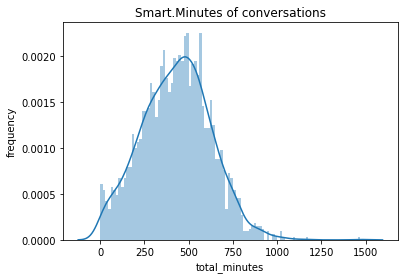

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Ultra.Minutes of conversations')

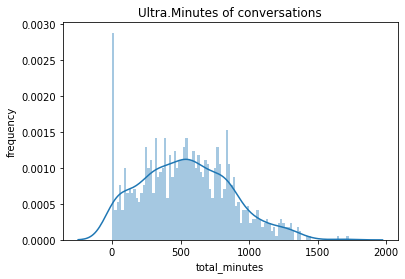

In [254]:
plt.ylabel('frequency')
plt.xlabel('total_minutes(min)')
sns.distplot(smart['total_minutes'],hist=True,bins=100).set_title('Smart.Minutes of conversations')
plt.show()
plt.ylabel('frequency')
plt.xlabel('total_minutes(min)')
sns.distplot(ultra['total_minutes'],hist=True,bins=100).set_title('Ultra.Minutes of conversations')

##### Вывод:   
Судя по визуализации распределение количества звонков близка к нормальному распределению. Можно было бы избавится от выбросов, но это может исказить статистику. 
количество минут разговора для тарифа смарта около 400 минут, а для тарифа ультра около 500.
Пользователи тарифа смарт выговаривают практически весь лимит за месяц, в то время как пользователи тарифа ультра имеют в запасе около 2500 минут.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


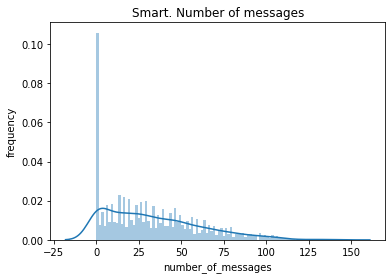

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Ultra. Number of messages')

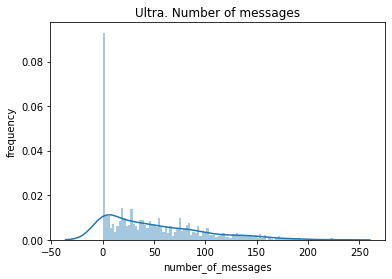

In [255]:
plt.ylabel('frequency')
plt.xlabel('number_of_messages(count)')
sns.distplot(smart['number_of_messages'],bins=100,hist=True).set_title('Smart. Number of messages')
plt.show()
plt.ylabel('frequency')
plt.xlabel('number_of_messages(count)')
sns.distplot(ultra['number_of_messages'],bins=100,hist=True).set_title('Ultra. Number of messages')

##### Вывод: распределения похожи друг на друга.  
Опять же пользователи тарифа смарт вписываются в лимит, а пользователи тарифа ультра в запасе имеют более 900 сообщений.  
При этом можно заметить, что сообщения не популярны, что в тарифе смарт, что в тарифе ультра.
Распределения количества сообщений в месяц стремятся к нормальному и скошены вправо, датасеты с положительной скошенностью. 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


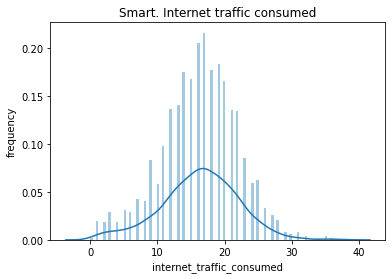

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Ultra. Internet traffic consumed')

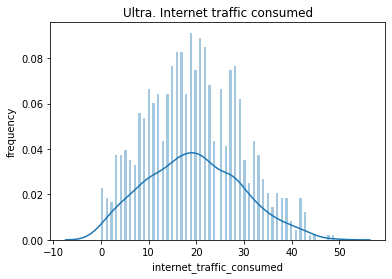

In [256]:
plt.ylabel('frequency')
plt.xlabel('internet_traffic_consumed(gb)')
sns.distplot(smart['internet_traffic_consumed'],bins=100,hist=True).set_title('Smart. Internet traffic consumed')
plt.show()
plt.ylabel('frequency')
plt.xlabel('internet_traffic_consumed(gb)')
sns.distplot(ultra['internet_traffic_consumed'],bins=100,hist=True).set_title('Ultra. Internet traffic consumed')

##### Вывод:  
Пользователи тарифа смарт в среднем выходят за границы лимита, а пользователи тарифа ультра в среднем имеют в запасе чуть больше 10 Гб.  
Распределения интернет-трафика стремится к нормальному распределению.  
График тарифа смарт построен на основе датасета с отрицательной скошенностью.  


### Шаг 4. Проверка гипотез <a name="step4"></a>

##### 4.1. Гипотеза: 'средняя выручка пользователей тарифов «Ультра» и «Смарт» различается' <a name="h_1"></a>

Буду использовать t-критерий Стьюдента, потому что сравниваемые выборки независимы между собой.  
Сформулирую нулевую гипотезу H₀ и альтернативную гипотезу H₁.

H₀ всегда формулируется так, чтобы использовать знак равенства.  
H₀: средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается  
H₁: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается  


Пороговое значение alpha  задам равным 1%.

Сравню дисперсии. Дисперсии различаются,  следовательно можно воспользоваться параметром equal_var = False

In [257]:
smart_var = np.var(smart['proceeds_total'], ddof=1)
print(smart_var)

684832.7240895133


In [258]:
ultra_var=np.var(ultra['proceeds_total'], ddof=1)
print(ultra_var)

141516.745078617


In [259]:
alpha = .01

results = st.ttest_ind(
    smart['proceeds_total'], 
    ultra['proceeds_total'],
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.7897104728368674e-238
Отвергаем нулевую гипотезу


Вероятность того, что нулевая гипотеза истинна, меньше порогового значения.  
Следовательно,  можно отвергнуть нулевую гипотезу и утверждать, что средняя выручка пользователей различается.

##### 4.2. Гипотеза: 'средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов'<a name="h_2"></a>

Для начала определю датасеты для пользователей-Москвичей и пользователей-иногородних, наложив условие на признак **city**.

In [260]:
display(total_data_on_month['city'].head())

0         Москва
1         Москва
2    Стерлитамак
3    Стерлитамак
4    Стерлитамак
Name: city, dtype: object

In [261]:
moscow = total_data_on_month.query("city == 'Москва'")
display(moscow.head())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff,user_id,city,month,month_name,total_minutes,number_of_messages,internet_traffic_consumed,rest_minutes,rest_message,rest_mb_gb,proceeds_over,proceeds_total
0,50,15.0,500,550,200,3,3,smart,1001,Москва,11,November,444,0,18.0,-56,-50,3.0,600,1150
1,50,15.0,500,550,200,3,3,smart,1001,Москва,12,December,430,0,14.0,-70,-50,-1.0,0,550
32,50,15.0,500,550,200,3,3,smart,1007,Москва,4,April,202,11,8.0,-298,-39,-7.0,0,550
33,50,15.0,500,550,200,3,3,smart,1007,Москва,5,May,490,39,18.0,-10,-11,3.0,600,1150
34,50,15.0,500,550,200,3,3,smart,1007,Москва,6,June,558,26,14.0,58,-24,-1.0,174,724


In [262]:
moscow['proceeds_total'].describe().T

count     611.000000
mean     1556.474632
std       753.464876
min       550.000000
25%       792.500000
50%      1776.000000
75%      1950.000000
max      5357.000000
Name: proceeds_total, dtype: float64

In [263]:
np.var(moscow['proceeds_total'])

566780.1707967191

In [264]:
other = total_data_on_month.query("city != 'Москва'")
display(other.head())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff,user_id,city,month,month_name,total_minutes,number_of_messages,internet_traffic_consumed,rest_minutes,rest_message,rest_mb_gb,proceeds_over,proceeds_total
2,50,15.0,500,550,200,3,3,smart,1002,Стерлитамак,6,June,118,4,11.0,-382,-46,-4.0,0,550
3,50,15.0,500,550,200,3,3,smart,1002,Стерлитамак,7,July,219,11,18.0,-281,-39,3.0,600,1150
4,50,15.0,500,550,200,3,3,smart,1002,Стерлитамак,8,August,294,13,20.0,-206,-37,5.0,1000,1550
5,50,15.0,500,550,200,3,3,smart,1002,Стерлитамак,9,September,217,4,17.0,-283,-46,2.0,400,950
6,50,15.0,500,550,200,3,3,smart,1002,Стерлитамак,10,October,221,10,14.0,-279,-40,-1.0,0,550


In [265]:
other['proceeds_total'].describe().T

count    2603.000000
mean     1537.181713
std       812.204883
min       550.000000
25%       750.000000
50%      1628.000000
75%      1950.000000
max      6824.000000
Name: proceeds_total, dtype: float64

In [266]:
np.var(other['proceeds_total'])

659423.3427005654

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


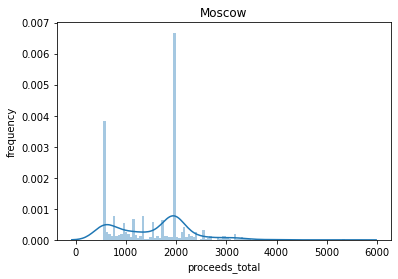

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Other cities')

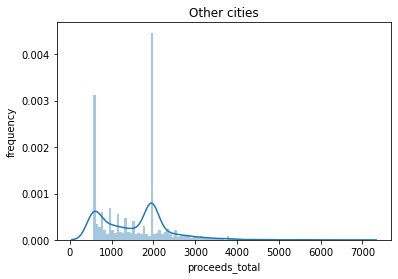

In [267]:
plt.ylabel('frequency')
plt.xlabel('proceeds_total(rubles)')
sns.distplot(moscow['proceeds_total'],bins=100,hist=True).set_title('Moscow')
plt.show()
plt.ylabel('frequency')
plt.xlabel('proceeds_total(rubles)')
sns.distplot(other['proceeds_total'],bins=100,hist=True).set_title('Other cities')

In [268]:
total_data_on_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   messages_included          3214 non-null   int64  
 1   mb_per_month_included      3214 non-null   float64
 2   minutes_included           3214 non-null   int64  
 3   rub_monthly_fee            3214 non-null   int64  
 4   rub_per_gb                 3214 non-null   int64  
 5   rub_per_message            3214 non-null   int64  
 6   rub_per_minute             3214 non-null   int64  
 7   tariff                     3214 non-null   object 
 8   user_id                    3214 non-null   int64  
 9   city                       3214 non-null   object 
 10  month                      3214 non-null   int64  
 11  month_name                 3214 non-null   object 
 12  total_minutes              3214 non-null   int64  
 13  number_of_messages         3214 non-null   int64

H₀:средняя выручка пользователей из Москвы и других городов не различается   
H₁: средняя выручка пользователей из Москвы и других городов различается


In [269]:
alpha=0.5
moscow = total_data_on_month.query("city == 'Москва'")
other_cities = total_data_on_month.query("city != 'Москва'")
results = st.ttest_ind(
    moscow['proceeds_total'],
    other_cities['proceeds_total']
    ,equal_var=False
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5749090668370982
Не получилось отвергнуть нулевую гипотезу


Так как вероятность истинности равна 57% можно утверждать, что мы не можем отвергнуть нулевую гипотезу.

### Шаг 5.Общий вывод <a name="step5"></a>

##### Главная цель проекта
**Необходимо проанализировать поведение клиентов и сделать вывод — какой тариф лучше**

Работа состояла из **4** этапов:
##### 1 этап  
На первом этапе были прочитаны и изучены файлы **calls**, **users**, **messages**, **internet** и **tariffs**.  
Файлы были сформированы в одноименные датасеты.    

Также были выявлены следующие проблемы:  

    1) обнаружены пропущенные значения  
    2) несоответствие типов данных,   
    3) и уже в ходе предобработки в датасете internet был обнаружен признак, которого не было представлено в описании данных, вскоре было обнаружено, что это ошибка в самом файле  

##### 2 этап
На втором этапе выявленные проблемы были устранены.

    1) во всех датасетаx был изменен тип данных object на datetime в признаках,обозначающих дату, кроме датасета tariffs, в нем ошибок выявлено не было;  
    2) были приведены типы float в id, duration к типу int64, кроме признака **mb_used**;  
    3) был удален признак 'Unnamed' в датасете internet;
    4) нулевые звонки были заменены на единицу,  так как оплата таких звонков идет как оплата одной минуты.
   
Были добавлены новые признаки:  

    1) количество сделанных звонков и израсходованных минут разговора по месяцам (максимальное количество минут составило 1727, а среднее 469 в месяц);
    2) количество отправленных сообщений по месяцам (максимальное количество сообщений составило 224, а среднее 45 в месяц);
    3) объем израсходованного интернет-трафика по месяцам (максимальное количество объема составило 48 Гб, а среднее 16 Гб в месяц); 
    4) была сформирована новая таблица на основании датасетов и была выявлено,что в среднем пользователь переплачивает 561 на и платит в месяц около 1540 , а максимальная цена переплаты составляет 6274 и максимальная конечная цена равна 6824;
    5) количество пользователей тарифа смарт: 350, количество пользователей тарифа ультра: 148.

#####  3 этап
Пользователи тарифа ультра отправляют большее количество смс, дольше говорят по телефону и больше зависают в сети, нежели, чем пользователи тарифа смарт. Так как условия для пользователей тарифа ультра комфортнее и свободнее.
Но при этом можно заметить, что переплата за тариф у пользвоателей смарт почти в 7 раз больше, чем у пользователей тарифа ультра, но при этом месячная цена практически на тысячу рублей меньше.  


Количество минут разговора для тарифа смарта около 400 минут, а для тарифа ультра около 500.
Пользователи тарифа смарт выговаривают практически весь лимит за месяц, в то время как пользователи тарифа ультра имеют в запасе около 2500 минут.  

Пользователи тарифа смарт вписываются в лимит сообщений, а пользователи тарифа ультра в запасе имеют более 900 сообщений.

Пользователи тарифа смарт в среднем выходят за границы лимита объема интернет-трафика, а пользователи тарифа ультра в среднем имеют в запасе чуть больше 10 Гб.

#####  4 этап
Были сформулированы гипотезы и проверены c помощью t-критерия Стьюдента.  
Можно сделать вывод, что для пользователя экономнее покупать тариф смарт, в то время как для компании выгоднее продавать тариф ультра.